In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd

df = pd.read_csv('us_market_data_hourly_with_inflation_modified.csv')

df

,observation_date,GDP,CPI,unemployment,DGS30_x,Yield Spread,IND US,US UK,US RUSSIA,Interest Rate,DAAA,DBAA,DFF,Sentiment,DGS30_y,DGS10,DGS3MO,DGS2,inflation_rate
0,1990-01-01 00:00:00,16132.094663,215.260700,5.241472,5.531168,0.659944,51.525940,1.556631,39.111076,7.149201,6.330531,7.278809,4.333904,78.232921,5.531880,5.207840,4.258079,4.547690,3.639756
1,1990-01-01 01:00:00,16131.796186,215.258396,5.241510,5.531238,0.659974,51.525153,1.556635,39.110012,7.149256,6.330602,7.278882,4.333925,78.233079,5.531951,5.207907,4.258096,4.547727,3.639720
2,1990-01-01 02:00:00,16131.497706,215.256092,5.241548,5.531309,0.660005,51.524366,1.556639,39.108947,7.149311,6.330674,7.278956,4.333946,78.233236,5.532021,5.207974,4.258113,4.547763,3.639683
3,1990-01-01 03:00:00,16131.199223,215.253787,5.241586,5.531379,0.660035,51.523579,1.556644,39.107882,7.149366,6.330745,7.279030,4.333966,78.233393,5.532091,5.208040,4.258131,4.547799,3.639646
4,1990-01-01 04:00:00,16130.900736,215.251483,5.241624,5.531449,0.660066,51.522792,1.556648,39.106818,7.149421,6.330816,7.279103,4.333987,78.233550,5.532161,5.208107,4.258148,4.547836,3.639610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306812,2024-12-31 20:00:00,16133.587001,215.272220,5.241282,5.530817,0.659792,51.529876,1.556610,39.116399,7.148927,6.330175,7.278440,4.333800,78.232136,5.531529,5.207505,4.257991,4.547508,3.639939
306813,2024-12-31 21:00:00,16133.288540,215.269916,5.241320,5.530887,0.659822,51.529089,1.556614,39.115334,7.148982,6.330246,7.278514,4.333821,78.232293,5.531599,5.207572,4.258009,4.547544,3.639903
306814,2024-12-31 22:00:00,16132.990076,215.267612,5.241358,5.530958,0.659853,51.528301,1.556618,39.114270,7.149037,6.330317,7.278587,4.333841,78.232450,5.531670,5.207639,4.258026,4.547581,3.639866
306815,2024-12-31 23:00:00,16132.691608,215.265308,5.241396,5.531028,0.659883,51.527514,1.556623,39.113205,7.149092,6.330389,7.278661,4.333862,78.232607,5.531740,5.207706,4.258044,4.547617,3.639829


In [4]:
# Drop non-numeric columns for correlation and histograms
numeric_data = df.select_dtypes(include=['float64', 'int64'])

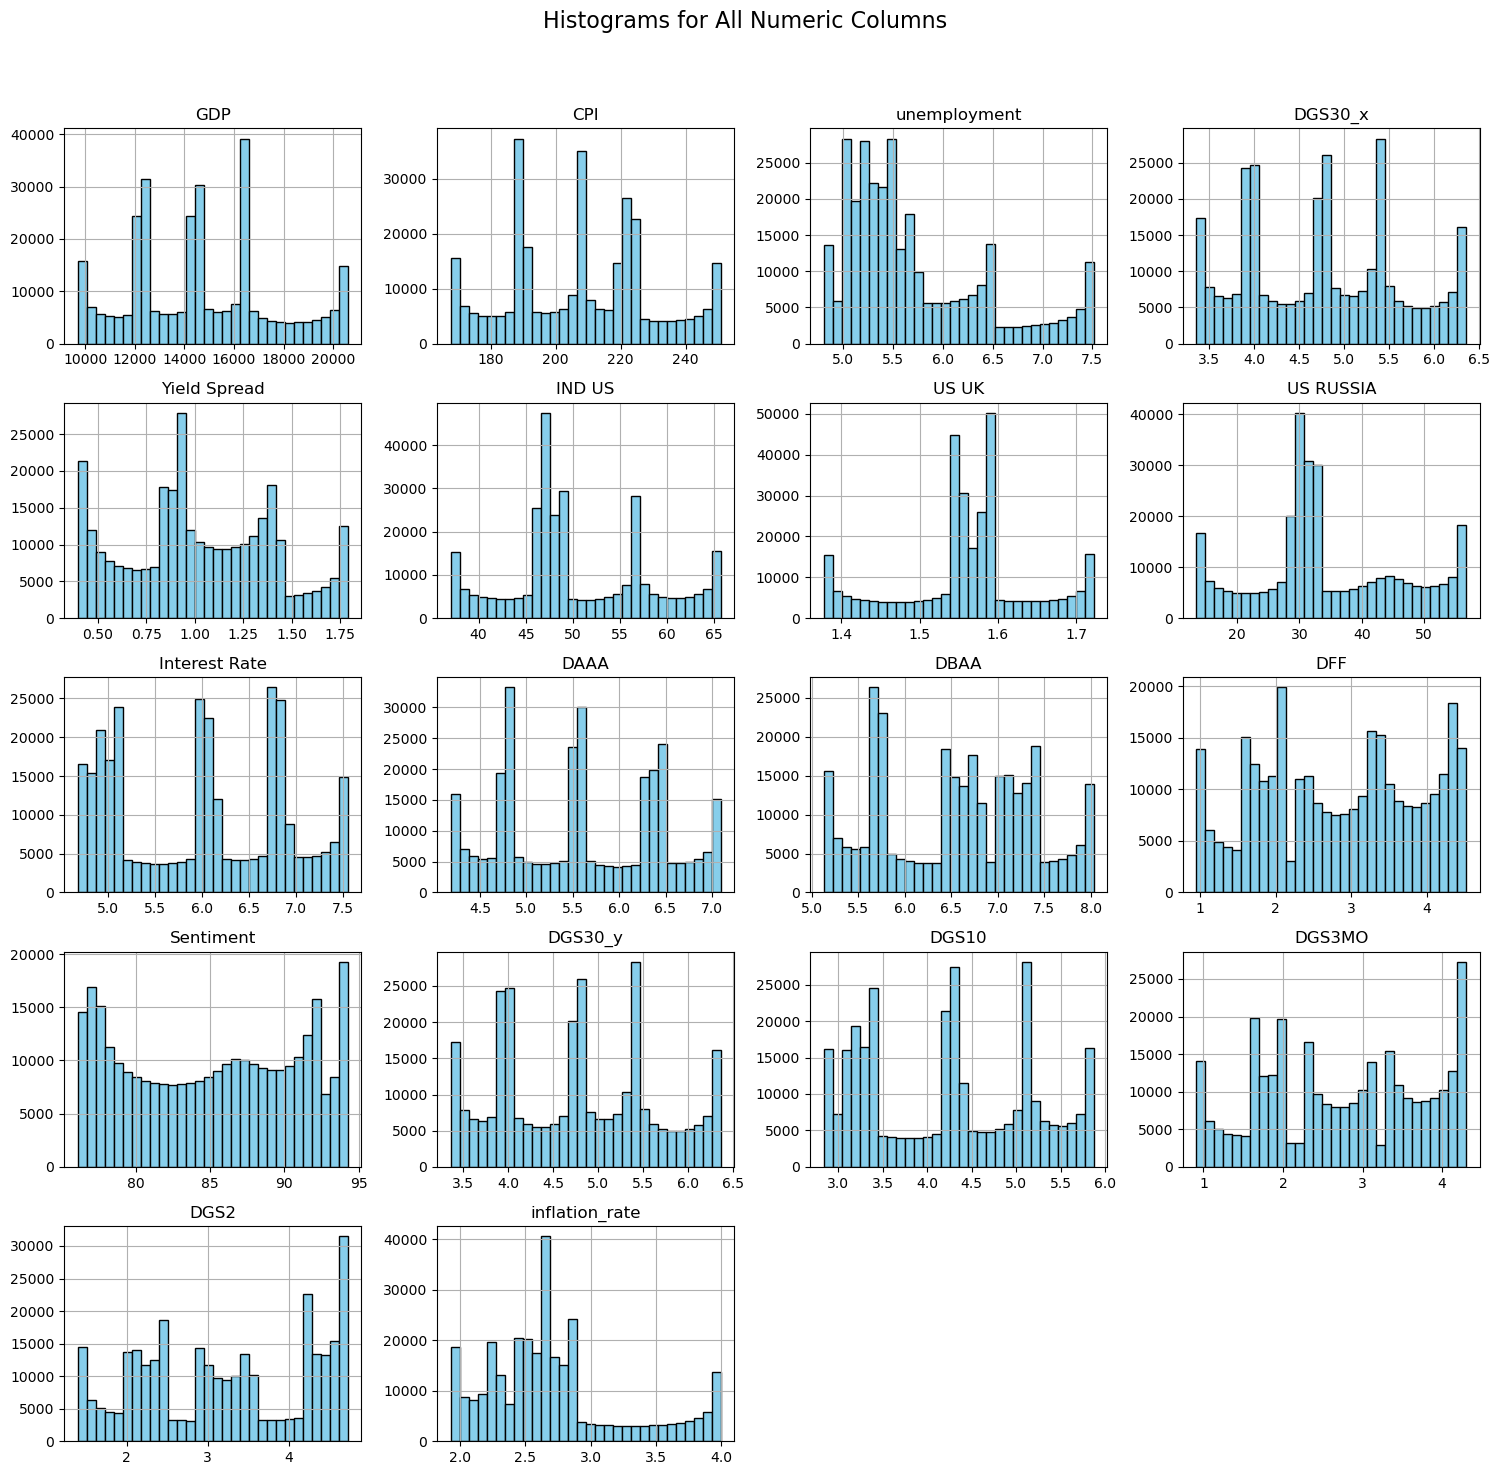

In [5]:
numeric_data.hist(bins=30, figsize=(15, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms for All Numeric Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
plt.show()

In [7]:
numeric_df = df.select_dtypes(include=['number'])

# Drop columns with negative values
filtered_df = numeric_df.loc[:, (numeric_df >= 0).all()]

In [ ]:
# Drop non-numeric columns for correlation and histograms
numeric_data = df.select_dtypes(include=['float64', 'int64'])

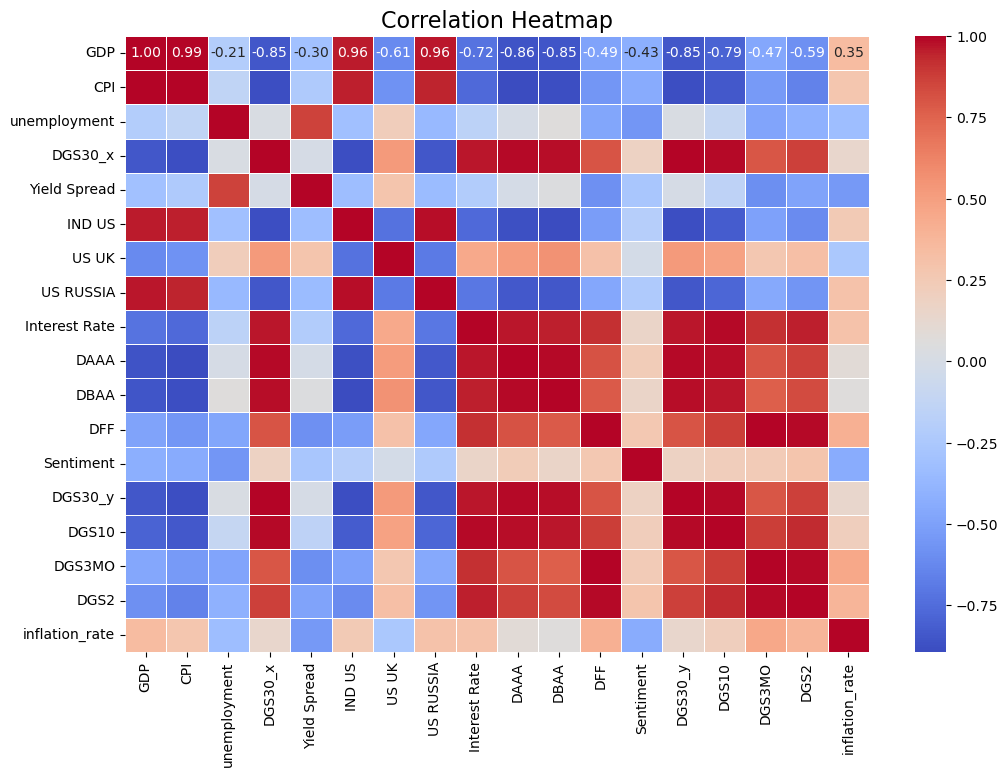

In [9]:
# Correlation Heatmap
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,cbar=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

C:\Users\Nilang\AppData\Local\Temp\ipykernel_26068\1134168925.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df[numeric_columns].fillna(method='ffill')


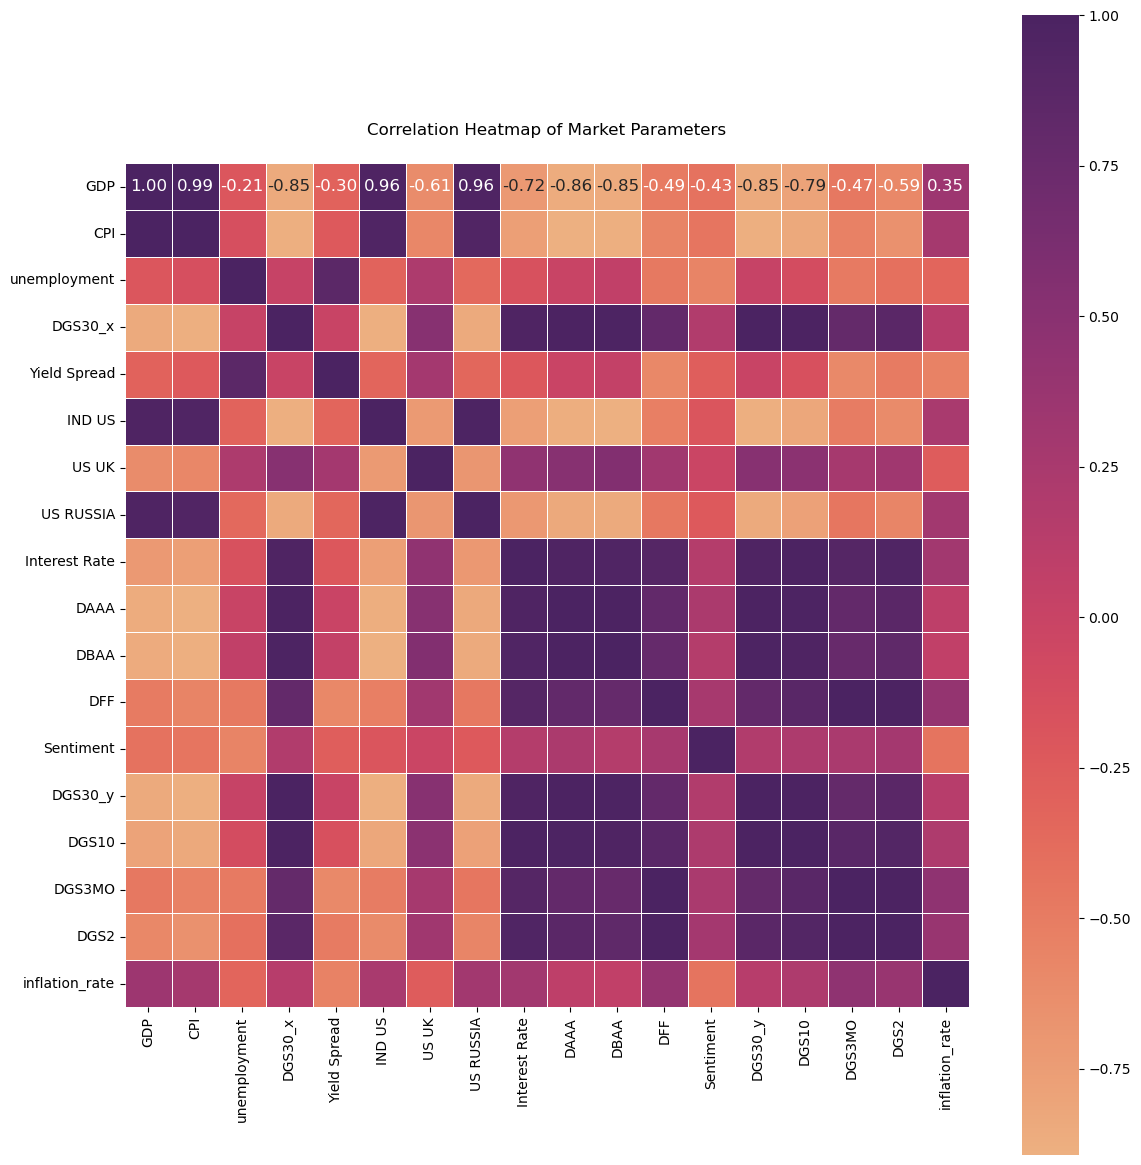

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

try:
    # Load data
    df = pd.read_csv('us_market_data_hourly_with_inflation_modified.csv')
    
    # Clean column names - remove leading/trailing spaces
    df.columns = df.columns.str.strip()
    
    # Select specific columns for correlation
    selected_columns = [
        'observation_date', 'GDP', 'CPI', 'unemployment', 'DGS30_x', 
        'Yield Spread', 'IND US', 'US UK', 'US RUSSIA', 'Interest Rate',
        'DAAA', 'DBAA', 'DFF', 'Sentiment', 'DGS30_y', 'DGS10', 
        'DGS3MO', 'DGS2', 'inflation_rate'
    ]
    
    # Convert observation_date to datetime
    df['observation_date'] = pd.to_datetime(df['observation_date'])
    
    # Drop observation_date for correlation calculation
    numeric_columns = [col for col in selected_columns if col != 'observation_date']
    
    # Handle NaN values
    df_clean = df[numeric_columns].fillna(method='ffill')
    
    # Create correlation matrix
    corr_matrix = df_clean.corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 12))
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='flare',
                fmt='.2f',
                square=True,
                linewidths=0.5,
                annot_kws={"size": 12})  # Increased font size for annotations
    
    plt.title('Correlation Heatmap of Market Parameters', pad=20)
    plt.tight_layout()
    plt.savefig('market_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

except FileNotFoundError:
    print("Error: Data file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")